## Differential Stress Calculation Script

Authors: Biao Wang*

*email: biao.wang@earth.ox.ac.uk

Last update: 2021.01.29

note: The data used in this calculation from Takemura and Dewaele 2008

### import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import linregress

### import data

In [2]:
# pressure and cell parameters data from Takemura and Dewaele 2008
df_td = pd.read_excel("Takemura_&_Dewaele_08_table3.xlsx")
# in the paper, they use this pressure
p_td = df_td.p_csz.to_numpy() 
# p = df.p_pid.to_numpy()
# wavelength
lam_td = df_td.lam.to_numpy()
# cell parameters of Au calculated from different reflections
a_au111 = df_td.a_au111.to_numpy()
a_au200 = df_td.a_au200.to_numpy()
a_au220 = df_td.a_au220.to_numpy()
a_au311 = df_td.a_au311.to_numpy()
a_au222 = df_td.a_au222.to_numpy()
a_au400 = df_td.a_au400.to_numpy()
a_au331 = df_td.a_au331.to_numpy()
a_au420 = df_td.a_au420.to_numpy()
a_au422 = df_td.a_au422.to_numpy()
# differential stress calculated in the paper
t_td = df_td.t_gpa.to_numpy()
# anistropy parameter from Golding et al., 1967 digitilized from Takemura and Dewaele 2008
df_bgtd = pd.read_excel("Golding_etal_67.xlsx")
p_bgtd = df_bgtd.p.to_numpy()
s_bgtd = df_bgtd.s.to_numpy()
# bulid a function of anistropy parameter using polynomial fit
fs_bgtd = np.poly1d(np.polyfit(p_bgtd, s_bgtd, 6))

### bulid functions for further use

In [3]:
######################### linear function for linear fit ################################
# define a fitting function called linear which takes
# in the x-data (x) and returns a line with equation
# mx+b which best fits the data
def linear(x, m, b):
    return m*x + b
############################ Gama factor calculation ####################################
def gama_cal(h, k, l):
    gama = (h**2*k**2+k**2*l**2+l**2*h**2)/((h**2+k**2+l**2)**2)
    return gama
######## sin(thwta)^2 calculation from cell parameter and wavelength ####################
def sintheta_sqrt_cal(a, h, k, l):
    sintheta_sqrt = ((lam_td**2)*(h**2+k**2+l**2))/(4*a**2)
    return sintheta_sqrt

### anisotropy parameter

In [4]:
# use elastic constant from Golding et al., 1967 direct calculated from given data
v = a_au111**3
v0 = 67.847    # Duffy et al., 1999
c11 = 192.4 + 6.73*p_td*(v/v0)**(1/3)   # c110 from Duffy et al., 1999
c12 = 163.3 + 5.86*p_td*(v/v0)**(1/3)   # c120 from Duffy et al., 1999
c44 = 41.8 + 1.84*p_td*(v/v0)**(1/3)    # c440 from Duffy et al., 1999
s_td = 1/(c11-c12) - 1/(2*c44)
# # use elastic constant from Hiki & Granato 1966 direct calculated from given data in Takemura and Dewaele
# v = a_au111**3
# v0 = 67.847    
# c11 = 192.4 + 5.72*p_td*(v/v0)**(1/3)   # c110 from Duffy et al., 1999
# c12 = 163.3 + 4.96*p_td*(v/v0)**(1/3)   # c120 from Duffy et al., 1999
# c44 = 41.8 + 1.52*p_td*(v/v0)**(1/3)    # c440 from Duffy et al., 1999
# s = 1/(c11-c12) - 1/(2*c44)

### horizontal axis of gamma plot

In [5]:
gama_au111 = 3*(1-3*sintheta_sqrt_cal(a_au111, 1, 1, 1))*gama_cal(1, 1, 1)
gama_au200 = 3*(1-3*sintheta_sqrt_cal(a_au200, 2, 0, 0))*gama_cal(2, 0, 0)
gama_au220 = 3*(1-3*sintheta_sqrt_cal(a_au220, 2, 2, 0))*gama_cal(2, 2, 0)
gama_au311 = 3*(1-3*sintheta_sqrt_cal(a_au311, 3, 1, 1))*gama_cal(3, 1, 1)
gama_au222 = 3*(1-3*sintheta_sqrt_cal(a_au222, 2, 2, 2))*gama_cal(2, 2, 2)
gama_au400 = 3*(1-3*sintheta_sqrt_cal(a_au400, 4, 0, 0))*gama_cal(4, 0, 0)
gama_au331 = 3*(1-3*sintheta_sqrt_cal(a_au331, 3, 3, 1))*gama_cal(3, 3, 1)
gama_au420 = 3*(1-3*sintheta_sqrt_cal(a_au420, 4, 2, 0))*gama_cal(4, 2, 0)
gama_au422 = 3*(1-3*sintheta_sqrt_cal(a_au422, 4, 2, 2))*gama_cal(4, 2, 2)

### differential stress calculation (linregress)

In [8]:
""" Au peaks """
# au111
x1 = gama_au111
y1 = a_au111
# au200
x2 = gama_au200
y2 = a_au200
# au220
x3 = gama_au220
y3 = a_au220
# au311
x4 = gama_au311
y4 = a_au311
# au222
x5 = gama_au222
y5 = a_au222
# au400
x6 = gama_au400
y6 = a_au400
# au331
x7 = gama_au331
y7 = a_au331
# au420
x8 = gama_au420
y8 = a_au420
# au422
x9 = gama_au422
y9 = a_au422
# calculate slopes m1 and intercepts m0
slopes = []
intercepts = [] 
for i in range(0,len(p_td)):
    x = [x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i]]
    y = [y1[i],y2[i],y3[i],y4[i],y5[i],y6[i],y7[i],y8[i],y9[i]]
    # x = [x1[i],x2[i],x3[i]]
    # y = [y1[i],y2[i],y3[i]]
    cleanx = [x for x in x if str(x) != 'nan']
    cleany = [x for x in y if str(x) != 'nan']
    result = linregress(cleanx, cleany)
    slope = result.slope
    intercept = result.intercept
    slopes.append(slope)
    intercepts.append(intercept)
m1 = slopes # slope for stress cal
m0 = intercepts # intercept for stress cal
# lower bound of stress
t_td_cal = (-3)*(m1/(m0*s_td))
# t_cal = (-3)*(m1/(m0*fs_bgtd(p)))

### differential stress calculation (linear curve fit)

In [7]:
""" Au peaks """
# au111
x1 = gama_au111
y1 = a_au111
# au200
x2 = gama_au200
y2 = a_au200
# au220
x3 = gama_au220
y3 = a_au220
# au311
x4 = gama_au311
y4 = a_au311
# au222
x5 = gama_au222
y5 = a_au222
# au400
x6 = gama_au400
y6 = a_au400
# au331
x7 = gama_au331
y7 = a_au331
# au420
x8 = gama_au420
y8 = a_au420
# au422
x9 = gama_au422
y9 = a_au422
# calculate slopes m1 and intercepts m0
popts = []
perrs = []
slopes = []
intercepts = []
for i in range(0,len(p_td)):
    x = [x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i]]
    y = [y1[i],y2[i],y3[i],y4[i],y5[i],y6[i],y7[i],y8[i],y9[i]]
#     x = [x1[i],x2[i],x3[i]]
#     y = [y1[i],y2[i],y3[i]]
    cleanx = [x for x in x if str(x) != 'nan']
    cleany = [x for x in y if str(x) != 'nan']
    popt, pcov = scipy.optimize.curve_fit(linear, cleanx, cleany, p0=[((y1[i]-y2[i])/(x1[i]-x2[i])), y2[i]])
    popts.append(popt)
    perrs.append(np.sqrt(np.diag(pcov)))
    slopes.append(popt[0])
    intercepts.append(popt[1]) 
m1 = slopes # slope for stress cal
m0 = intercepts # intercept for stress cal
# # lower bound of stress
t_cal = (-3)*(m1/(m0*s))
# t_cal = (-3)*(m1/(m0*fs_bgtd(p)))

NameError: name 'p' is not defined

### compare calculated differential stress with paper

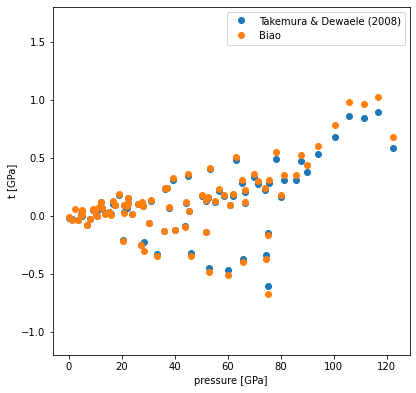

In [9]:
# plt.close()
fig = plt.figure(figsize=(6.4, 6.4))
gs = gridspec.GridSpec(1,1)
ax0 = fig.add_subplot(gs[0])
ax0.plot(p_td, t_td, "o", c="C0", label="Takemura & Dewaele (2008)")
ax0.plot(p_td, t_td_cal, "o", c="C1", label="Biao")
# ax0.plot(p_td, t_td-t_td_cal, "o", c="C2")
ax0.legend()
ax0.set_ylim(-1.2, 1.8)
ax0.set_xlabel("pressure [GPa]")
ax0.set_ylabel("t [GPa]")
plt.savefig("diffstress_takemura_and_dewaele_08.png", dpi=600)
os.startfile("diffstress_takemura_and_dewaele_08.png")

### compare the gamma plot at 117 GPa

In [10]:
# calculated gamma plot data at 117 GPa
p_td[84] 
gama_td117 = [x1[84],x2[84],x3[84],x4[84],x5[84],x6[84],x7[84],x8[84],x9[84]]
a_td117 = [y1[84],y2[84],y3[84],y4[84],y5[84],y6[84],y7[84],y8[84],y9[84]]
# gamma plot fit at 117 GPa
gama_td117fit = np.linspace(0, 1, 10)
a_td117fit = linear(gama_td117fit, m1[84], m0[84])

In [14]:
# digitilized data at 117GPa
df_fig8 = pd.read_excel(r"Takemura_&_Dewaele_08_fig8f.xlsx")
gama_fig8 = df_fig8.x.to_numpy()
a_fig8 = df_fig8.y.to_numpy()
gama_fig8_fit = df_fig8.x_fit.to_numpy()
a_fig8_fit = df_fig8.y_fit.to_numpy()

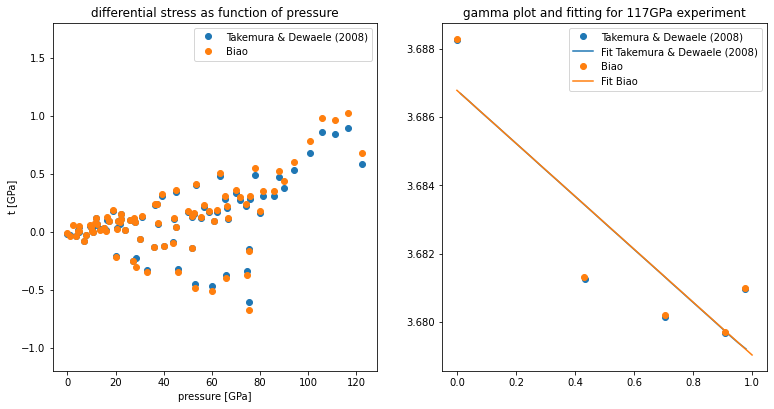

In [15]:
# plt.close()
fig = plt.figure(figsize=(12.8, 6.4))
gs = gridspec.GridSpec(1,2)
ax0 = fig.add_subplot(gs[0])
ax0.plot(p_td, t_td, "o", c="C0", label="Takemura & Dewaele (2008)")
ax0.plot(p_td, t_td_cal, "o", c="C1", label="Biao")
# ax0.plot(p_td, t_td-t_td_cal, "o", c="C2")
ax0.legend()
ax0.set_ylim(-1.2, 1.8)
ax0.set_xlabel("pressure [GPa]")
ax0.set_ylabel("t [GPa]")
ax0.set_title("differential stress as function of pressure")
ax1 = fig.add_subplot(gs[1])
ax1.plot(gama_fig8, a_fig8, "o", c="C0", label="Takemura & Dewaele (2008)")
ax1.plot(gama_fig8_fit, a_fig8_fit, c="C0", label="Fit Takemura & Dewaele (2008)")
ax1.plot(gama_td117, a_td117, "o", c="C1", label="Biao")
ax1.plot(gama_td117fit, a_td117fit, c="C1", label="Fit Biao")
ax1.set_title("gamma plot and fitting for 117GPa experiment")
ax1.legend()
plt.savefig("diffstress_takemura_and_dewaele_08(1).png", dpi=600)
os.startfile("diffstress_takemura_and_dewaele_08(1).png")

In [14]:
results = {"col1":t_cal}
results = pd.DataFrame(results)
np.savetxt("calculated_t.csv", results, delimiter=",", header="tcal")
os.startfile("calculated_t.csv")

Knowledge needs to be shared, and those who create it need to be respected.